In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

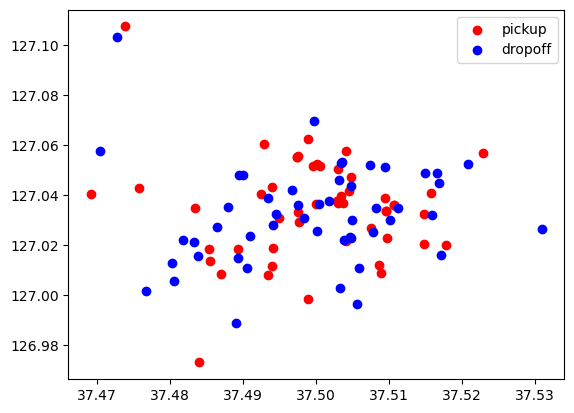

In [8]:
prob = json.load(open('../../alg_test_problems_20240429/TEST_K50_1.json'))
dist_mat = np.array(prob['DIST'])
orders = np.array(prob['ORDERS'])
pickup_coord = orders[:, 2:4]
dropoff_coord = orders[:, 4:6]
K = 50

plt.scatter(pickup_coord[:,0], pickup_coord[:,1], c='r', label='pickup')
plt.scatter(dropoff_coord[:,0], dropoff_coord[:,1], c='b', label='dropoff')
plt.legend()
plt.show()

/home/jung/anaconda3/envs/ogc2024/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 3 7 0 1 3 1 3 0 1 7 6 1 7 1 4 0 0 2 3 0 5 6 3 1 6 1 1 7 3 0 7 3 0 1 1
 7 3 1 1 3 1 7 0 0 1 7 0 7]


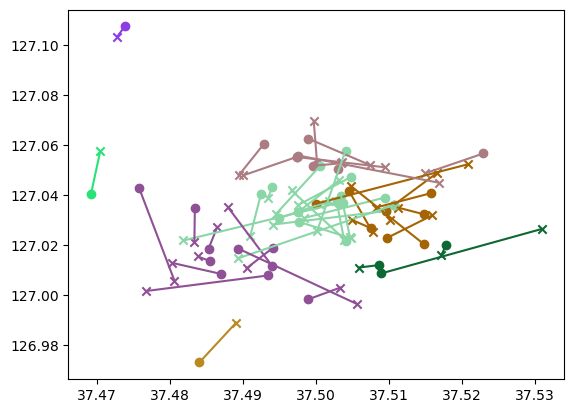

In [9]:
pickups = dist_mat[:K, :K]
delvs = dist_mat[K:, K:]
pickup_to_delvs = dist_mat[:K, K:]
delv_to_pickups = dist_mat[K:, :K]
# (pickup_to_delvs + delv_to_pickups) / 2
# pickup_to_delvs, delv_to_pickups

alpha, beta, gamma = 1, 1, 1
sum_mat = alpha * pickups + beta * delvs + gamma * (pickup_to_delvs + delv_to_pickups) / 2
num_clusters = 8

cluster = KMeans(n_clusters=num_clusters)
# cluster = DBSCAN(eps=0.5, min_samples=2)
# cluster = AgglomerativeClustering(n_clusters=8)
labels = cluster.fit_predict(sum_mat)
print(labels)

# color = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange']
colors = np.random.uniform(0, 1, (K, 3))
for i in range(K):
    label = labels[i]
    pickup_x, pickup_y = pickup_coord[i]
    dropoff_x, dropoff_y = dropoff_coord[i]
    color = colors[label]
    plt.scatter(pickup_x, pickup_y, color=color)
    plt.scatter(dropoff_x, dropoff_y, color=color, marker='x')
    plt.plot([pickup_x, dropoff_x], [pickup_y, dropoff_y], color=color)
    
# plt.scatter(pickup_coord[:,0], pickup_coord[:,1], c='r', label='pickup')
# plt.scatter(dropoff_coord[:,0], dropoff_coord[:,1], c='b', label='dropoff')
# plt.legend()
plt.show()

In [13]:
bundles = [[None, None, None] for _ in range(num_clusters)]
for i in range(num_clusters):
    cluster_idx = np.where(labels == i)[0]
    bundles[i][1] = cluster_idx.tolist()
    bundles[i][2] = cluster_idx.tolist()

print(bundles)

[[None, [4, 9, 17, 18, 21, 31, 34, 44, 45, 48], [4, 9, 17, 18, 21, 31, 34, 44, 45, 48]], [None, [0, 1, 5, 7, 10, 13, 15, 25, 27, 28, 35, 36, 39, 40, 42, 46], [0, 1, 5, 7, 10, 13, 15, 25, 27, 28, 35, 36, 39, 40, 42, 46]], [None, [19], [19]], [None, [2, 6, 8, 20, 24, 30, 33, 38, 41], [2, 6, 8, 20, 24, 30, 33, 38, 41]], [None, [16], [16]], [None, [22], [22]], [None, [12, 23, 26], [12, 23, 26]], [None, [3, 11, 14, 29, 32, 37, 43, 47, 49], [3, 11, 14, 29, 32, 37, 43, 47, 49]]]


In [ ]:
RIDER_TYPES = ['WALK', 'BIKE', 'CAR']
for i in range(len(bundles)):
    bundle = bundles[i]
    min_cost = 1e9
    for r_type in RIDER_TYPES:
        bundle[0] = r_type

        #calculate cost
        
        #feasibility check
        
        